In [1]:
%cd '/content/drive/MyDrive/Colab Notebooks/store/hust/computer vision/bai tap/6'

/content/drive/MyDrive/Colab Notebooks/store/hust/computer vision/bai tap/6


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
img = cv2.imread('lines.png', cv2.IMREAD_GRAYSCALE)

(-0.5, 997.5, 1073.5, -0.5)

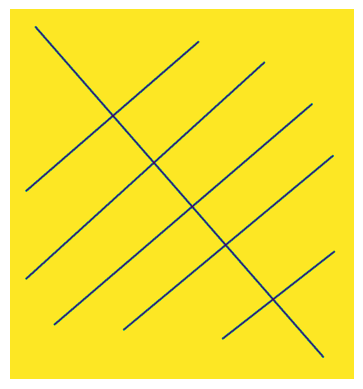

In [51]:
plt.imshow(img)
plt.axis('off')

In [53]:
# tiến hành FFT
DFT = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)

# reposition the zero-frequency component to the spectrum's middle
shift = np.fft.fftshift(DFT)
row, col = img.shape
center_row, center_col = row // 2, col // 2

In [63]:
# create a mask with a centered square of 1s
mask = np.zeros((row, col, 2), np.uint8)
mask[center_row - 900:center_row + 900, center_col - 900:center_col + 900] = 1

# put the mask and inverse DFT in place.
fft_shift = shift * mask
fft_ifft_shift = np.fft.ifftshift(fft_shift)
imageThen = cv2.idft(fft_ifft_shift)

In [65]:
 # calculate the magnitude of the inverse DFT
imageThen = cv2.magnitude(imageThen[:,:,0], imageThen[:,:,1])

(-0.5, 997.5, 1073.5, -0.5)

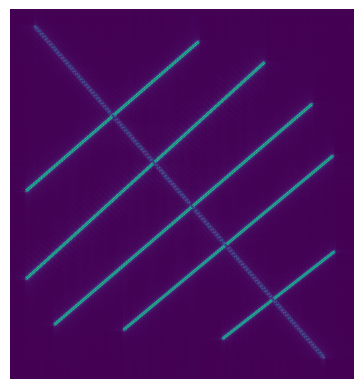

In [67]:
plt.imshow(imageThen)
plt.axis('off')

(-0.5, 997.5, 1073.5, -0.5)

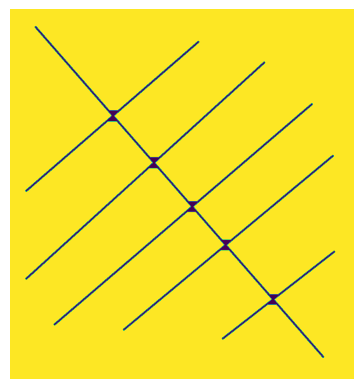

In [68]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25,1))
# Perform morphological opening (erosion followed by dilation)
opened_image = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
plt.imshow(opened_image)
plt.axis('off')

(-0.5, 997.5, 1073.5, -0.5)

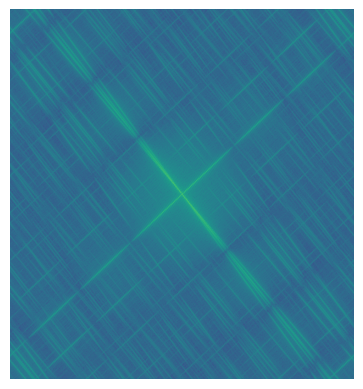

In [69]:
img = cv2.imread('lines.png', 0)
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

plt.imshow(magnitude_spectrum)
plt.axis('off')